In [5]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from load_data import *

In [6]:
images, labels, label_map = load_dataset()
augmented_images, augmented_labels = augment_data(images, labels)

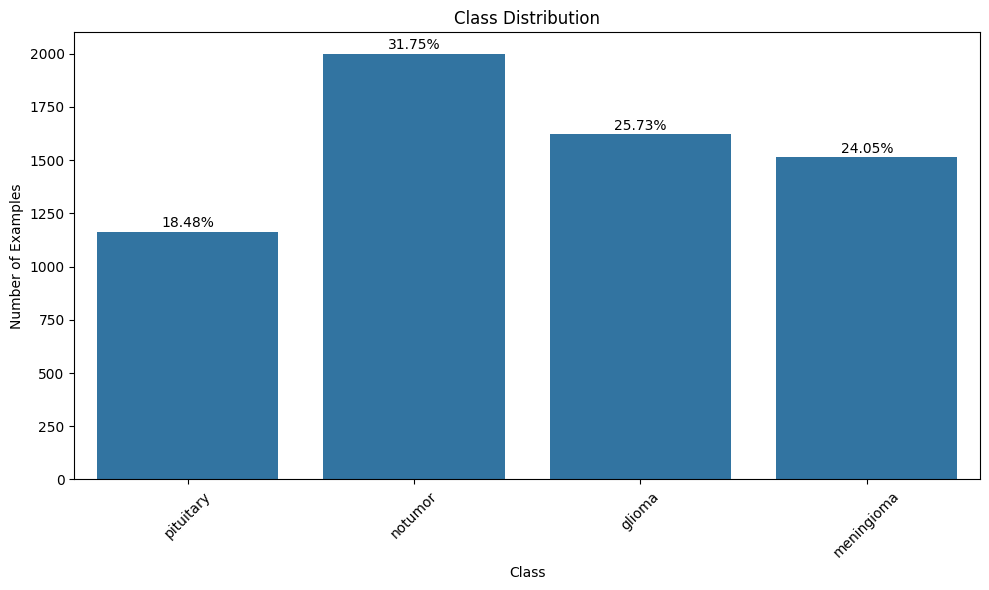

In [7]:
def visualize_class_distribution(labels, label_map):
    idx_to_class = {v: k for k, v in label_map.items()}
    
    # Get the count of each class
    unique, counts = np.unique(labels, return_counts=True)
    class_counts = {idx_to_class.get(idx, idx): count for idx, count in zip(unique, counts)}
    total = sum(counts)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Examples')
    plt.xticks(rotation=45)
    
    # percentage annotate
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 20, '{:1.2f}%'.format(100 * height/total), ha="center") 
    
    plt.tight_layout()
    
    plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
    
    plt.show()

visualize_class_distribution(labels, label_map)

In [ ]:
img_names = []
classes = []
img_sizes = []

for class_name in os.listdir('data'):
    class_path = os.path.join('data', class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        if os.path.isfile(img_path):

            with Image.open(img_path) as img:
                width, height = img.size

            img_names.append(img_name)
            classes.append(class_name)
            img_sizes.append((width, height))

info_df = pd.DataFrame({
    'img_name': img_names,
    'class': classes,
    'size': img_sizes,
})

info_df

,img_name,class,size
0,Tr-pi_0770.jpg,pituitary,"(512, 512)"
1,Te-pi_0058.jpg,pituitary,"(512, 512)"
2,Tr-pi_0311.jpg,pituitary,"(512, 512)"
3,Tr-pi_0467.jpg,pituitary,"(512, 512)"
4,Tr-pi_0815.jpg,pituitary,"(512, 512)"
...,...,...,...
6295,Tr-no_0498.jpg,notumor,"(206, 244)"
6296,Tr-no_1209.jpg,notumor,"(214, 236)"
6297,Tr-no_0449.jpg,notumor,"(630, 630)"
6298,Te-no_0361.jpg,notumor,"(512, 512)"


Data augmentation example:

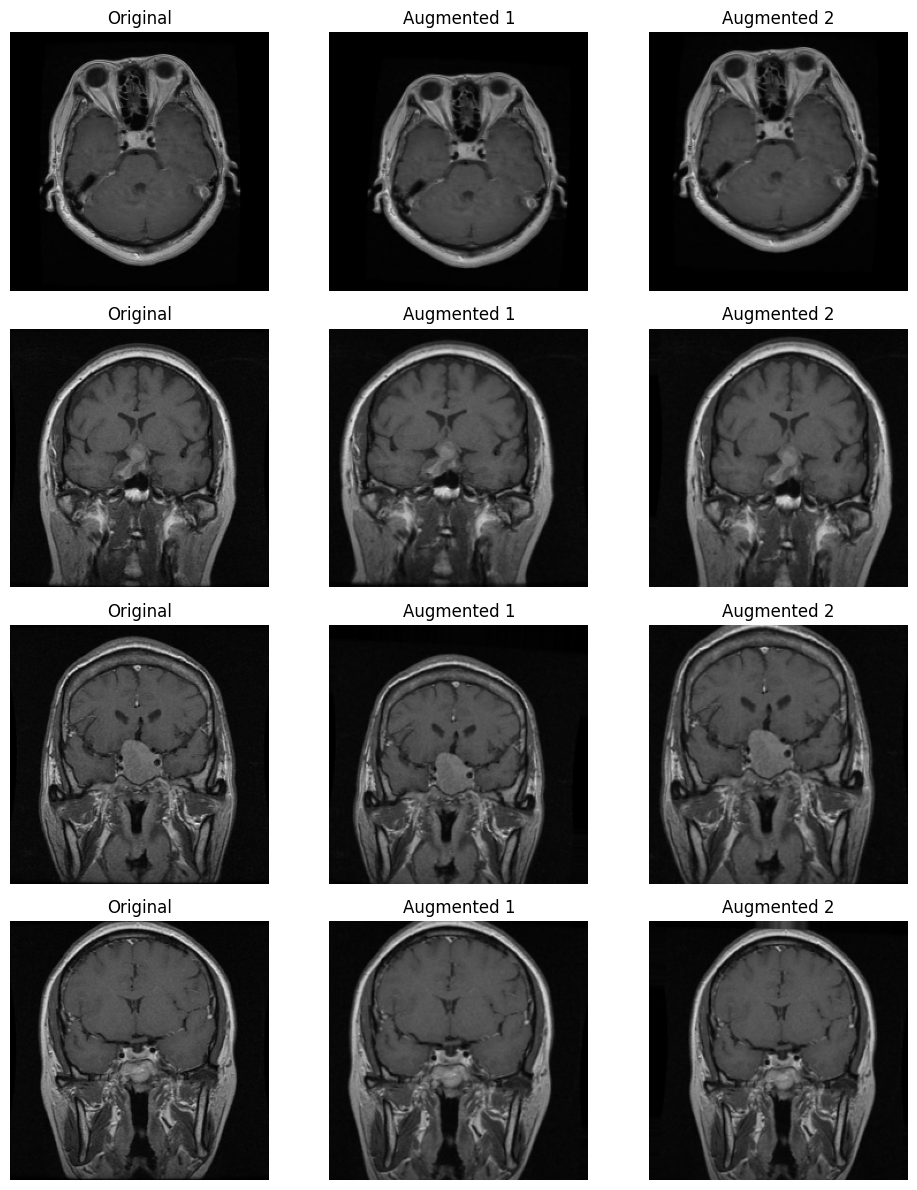

In [8]:
def visualize_images(original_images, augmented_images, n=4):
    fig, axes = plt.subplots(n, 3, figsize=(10, n * 3))
    
    for i in range(n):
        # Original image
        axes[i, 0].imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title(f'Original')
        axes[i, 0].axis('off')

        # Augmented image 1
        axes[i, 1].imshow(cv2.cvtColor(augmented_images[i * 3 + 1], cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title(f'Augmented 1')
        axes[i, 1].axis('off')

        # Augmented image 2
        axes[i, 2].imshow(cv2.cvtColor(augmented_images[i * 3 + 2], cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title(f'Augmented 2')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig('augmentation_example.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_images(images, augmented_images, n=4)

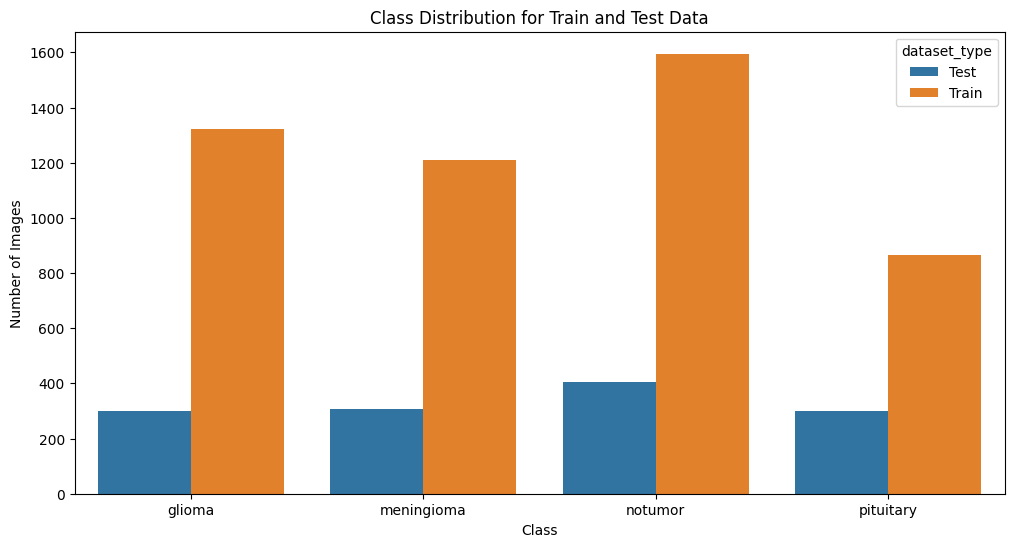

In [ ]:
#don't execute below, since we don't have train and test split anymore

# class_distribution = info_df.groupby(['dataset_type', 'class']).size().reset_index(name='count')

# plt.figure(figsize=(12, 6))
# sns.barplot(data=class_distribution, x='class', y='count', hue='dataset_type')
# plt.title('Class Distribution for Train and Test Data')
# plt.ylabel('Number of Images')
# plt.xlabel('Class')
# plt.show()

In [ ]:
class_counts = info_df.groupby('class').size()
print(class_counts)

class
glioma        1621
meningioma    1515
notumor       2000
pituitary     1164
dtype: int64


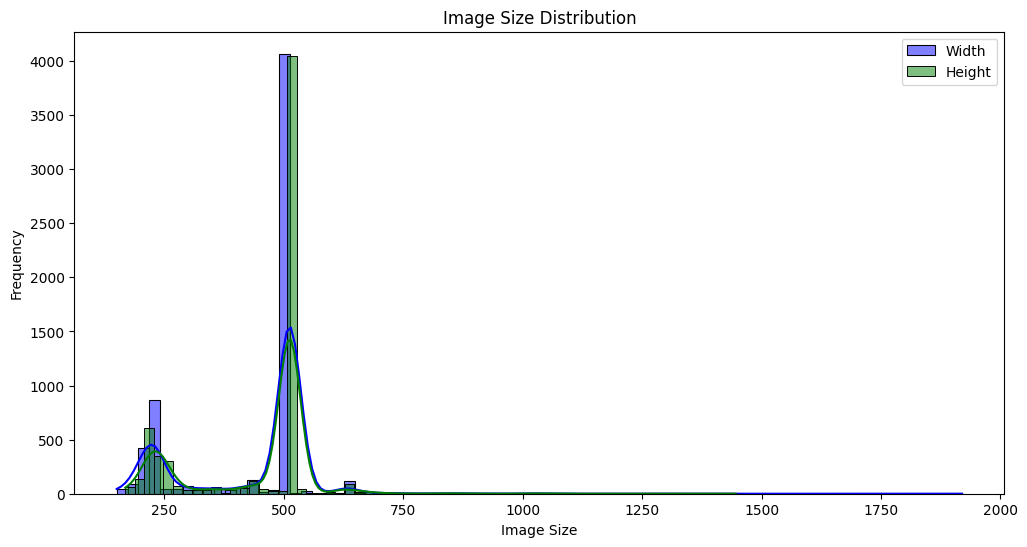

In [ ]:
plt.figure(figsize=(12, 6))

# Create a histogram for image widths
sns.histplot(info_df['size'].apply(lambda x: x[0]), kde=True, color='blue', label='Width')

# Create a histogram for image heights
sns.histplot(info_df['size'].apply(lambda x: x[1]), kde=True, color='green', label='Height')

plt.title('Image Size Distribution')
plt.xlabel('Image Size')
plt.ylabel('Frequency')

plt.legend()
plt.show()


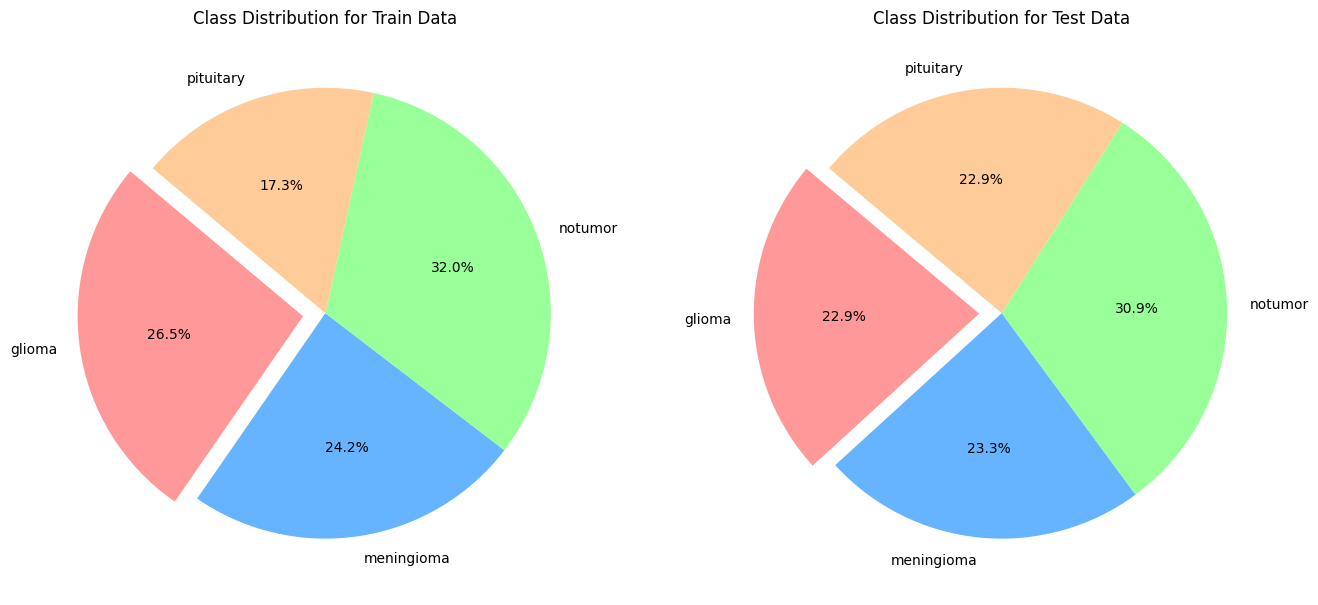

In [ ]:
class_counts = info_df.groupby(['dataset_type', 'class']).size().reset_index(name='count')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

for i, dataset_type in enumerate(['Train', 'Test']):
    class_counts_subset = class_counts[class_counts['dataset_type'] == dataset_type]
    
    # Create a list to specify which slices to explode
    explode = [0.1 if j == 0 else 0 for j in range(len(class_counts_subset))]
    
    axes[i].pie(
        class_counts_subset['count'],
        labels=class_counts_subset['class'],
        colors=colors,
        explode=explode,
        autopct='%1.1f%%',
        startangle=140
    )
    axes[i].set_title(f'Class Distribution for {dataset_type} Data')

plt.show()

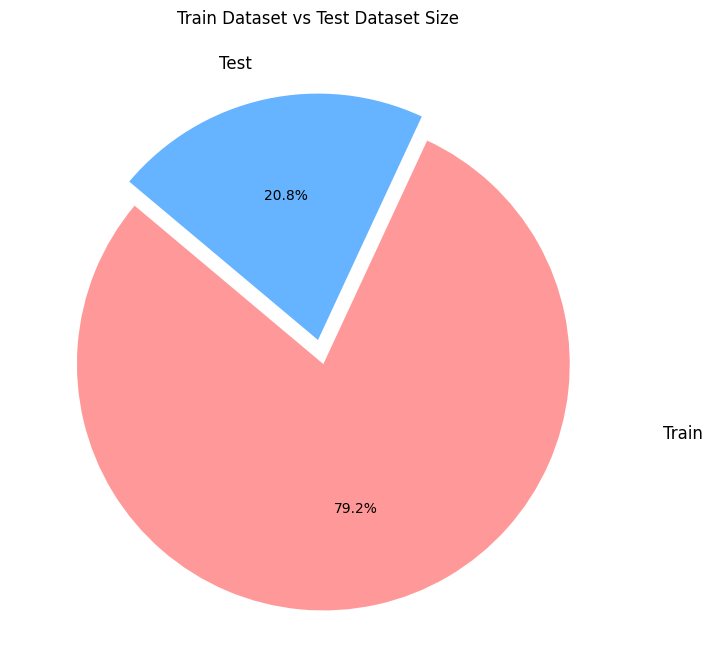

In [ ]:
train_size = len(info_df[info_df['dataset_type'] == 'Train'])
test_size = len(info_df[info_df['dataset_type'] == 'Test'])

plt.figure(figsize=(8, 8))
labels = ['Train', 'Test']
sizes = [train_size, test_size]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)   #explode the train slice

plt.pie(sizes, labels=None, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Train Dataset vs Test Dataset Size')

plt.text(1.4, -0.4, 'Train', fontsize=12, color='black')
plt.text(-0.4, 1.1, 'Test', fontsize=12, color='black')

plt.show()

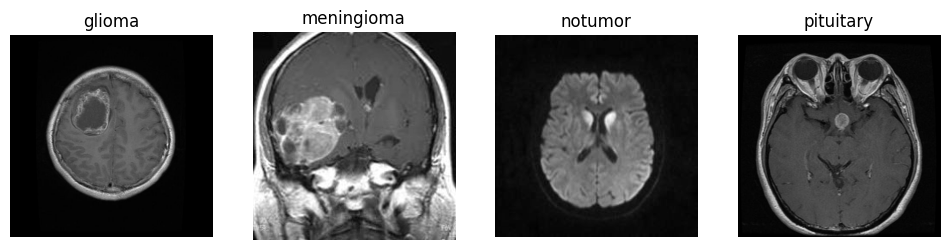

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

directories = {
    'Train': 'Train',
    'Test': 'Test'
}

classes_to_display = ['glioma', 'meningioma', 'notumor', 'pituitary']

image_paths = []
labels = []

for dataset_type, dir_name in directories.items():
    for class_name in classes_to_display:
        class_path = os.path.join(dir_name, class_name)
        class_images = [img_name for img_name in os.listdir(class_path) if img_name.startswith(f'Te-{class_name[:2].lower()}_')]
        if class_images:
            img_path = os.path.join(class_path, class_images[0])
            image_paths.append(img_path)
            labels.append(class_name)

# Display one image from each category in grayscale
fig = plt.figure(figsize=(12, 6))
for i in range(len(classes_to_display)):
    ax = fig.add_subplot(2, 4, i + 1)
    img = Image.open(image_paths[i]).convert('L')  # Convert to grayscale
    plt.axis('off')
    plt.title(labels[i])
    plt.imshow(img, cmap='gray')

plt.show()
